In [60]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra
import radical.entk as re 
from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob, os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

### Kernel stress-ng, Bridges

In [124]:
# define dataframes

df_6000 = pd.DataFrame(columns=['RCT overhead','Task Execution'])
experiments = [0,1,2]

rp_folder = glob.glob('../null_data_bridges/exp1/rp.*') # 2 hyperparameters 
re_folder = glob.glob('../null_data_bridges/exp1/re.*') # 2 hyperparameters 

src = rp_folder[0]

# enTK_session = ra.Session(stype = 'radical.entk', src = src , sid = 're.session.two.jdakka.017794.0034')
# enTK_states = enTK_session.list('state') # EXECUTED
# enTK_tasks = enTK_session.filter(etype = 'task') # , uid = task_ids

# session

rp_session = ra.Session(stype='radical.pilot', src=src)

# pilot duration

rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])

# units

rp_units = rp_session.filter(etype='unit', inplace=False)

rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'exec_start'}, {ru.EVENT: 'exec_stop'}])

df_6000.loc[0] = [rp_dur-exec_dur, exec_dur]
# re_submitted = enTK_tasks.timestamps(state = 'SUBMITTED')
# re_submitted = pd.DataFrame(re_submitted, columns = ['SUBMITTED (EnTK)'])

# location 2 

rp_folder = glob.glob('../null_data_bridges/exp2/rp.*') # 2 hyperparameters 
re_folder = glob.glob('../null_data_bridges/exp2/re.*') # 2 hyperparameters 

src = rp_folder[0]

# enTK_session = ra.Session(stype = 'radical.entk', src = src , sid = 're.session.two.jdakka.017794.0034')
# enTK_states = enTK_session.list('state') # EXECUTED
# enTK_tasks = enTK_session.filter(etype = 'task') # , uid = task_ids

# session

rp_session = ra.Session(stype='radical.pilot', src=src)

# pilot duration

rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])

# units

rp_units = rp_session.filter(etype='unit', inplace=False)

rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'exec_start'}, {ru.EVENT: 'exec_stop'}])


df_6000.loc[1] = [rp_dur-exec_dur, exec_dur]
# re_submitted = enTK_tasks.timestamps(state = 'SUBMITTED')
# re_submitted = pd.DataFrame(re_submitted, columns = ['SUBMITTED (EnTK)'])


df_6000
df_6000.insert(0, 'No. Hyperparameters', [2,4])
df_6000['No. Optimizations'] = [4,16]
df_6000['No. of Nodes'] = [4,16]
df_6000.index.names = ['']
%store df_6000

df_6000

Stored 'df_6000' (DataFrame)


,No. Hyperparameters,RCT overhead,Task Execution,No. Optimizations,No. of Nodes
,,,,,
0,2,10.0219,6008.1556,4,4
1,4,7.6757,6009.1947,16,16


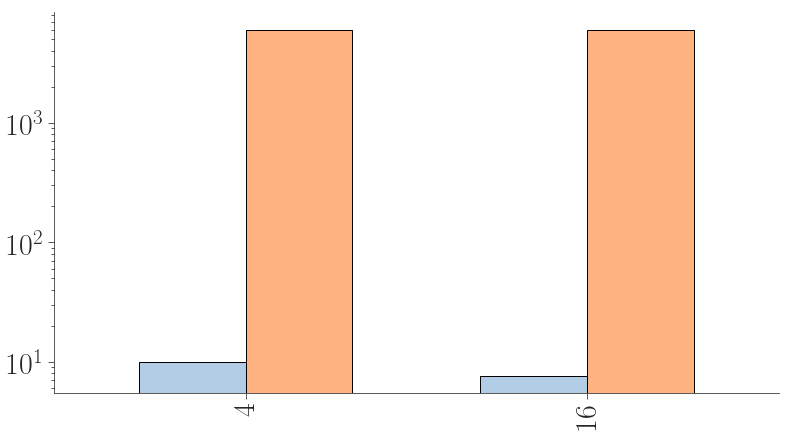

In [125]:
# define dataframes

df_12000 = pd.DataFrame(columns=['RCT overhead','Task Execution'])
experiments = [0,1,2]

rp_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/4_hyperparameters_12000/rp.*') # 2 hyperparameters 
re_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/4_hyperparameters_12000/re.*') # 2 hyperparameters 

src = rp_folder[0]

# enTK_session = ra.Session(stype = 'radical.entk', src = src , sid = 're.session.two.jdakka.017794.0034')
# enTK_states = enTK_session.list('state') # EXECUTED
# enTK_tasks = enTK_session.filter(etype = 'task') # , uid = task_ids

# session

rp_session = ra.Session(stype='radical.pilot', src=src)

# pilot duration

rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])

# units

units = rp_session.filter(etype='unit', inplace=False)
duration_exec = units.duration([rp.AGENT_EXECUTING, rp.AGENT_STAGING_OUTPUT_PENDING])

rp_dur = units.duration([rp.NEW, rp.DONE])
# exec_dur = units.duration(event=[{ru.EVENT: 'exec_start'}, {ru.EVENT: 'exec_start'}])

df_12000.loc[0] = [rp_dur-duration_exec, duration_exec]

# re_submitted = enTK_tasks.timestamps(state = 'SUBMITTED')
# re_submitted = pd.DataFrame(re_submitted, columns = ['SUBMITTED (EnTK)'])

# location 2 

rp_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/5_hyperparameters_12000/rp.*') # 2 hyperparameters 
re_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/5_hyperparameters_12000/re.*') # 2 hyperparameters 

src = rp_folder[0]

# enTK_session = ra.Session(stype = 'radical.entk', src = src , sid = 're.session.two.jdakka.017794.0034')
# enTK_states = enTK_session.list('state') # EXECUTED
# enTK_tasks = enTK_session.filter(etype = 'task') # , uid = task_ids

# session

rp_session = ra.Session(stype='radical.pilot', src=src)

# pilot duration

rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])

# units

units = rp_session.filter(etype='unit', inplace=False)

rp_dur = units.duration([rp.NEW, rp.DONE])
exec_dur = units.duration(event=[{ru.EVENT: 'exec_start'}, {ru.EVENT: 'exec_start'}])
duration_exec = units.duration([rp.AGENT_EXECUTING, rp.AGENT_STAGING_OUTPUT_PENDING])
exec_dur = 12026.73750

df_12000.loc[1] = [rp_dur-exec_dur, exec_dur]
# re_submitted = enTK_tasks.timestamps(state = 'SUBMITTED')
# re_submitted = pd.DataFrame(re_submitted, columns = ['SUBMITTED (EnTK)'])


# location 3

rp_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/6_hyperparameters_12000/rp.*') # 2 hyperparameters 
re_folder = glob.glob('/Users/JumanaDakka/git/hyperspace_experiments/stress-ng-12000/6_hyperparameters_12000/re.*') # 2 hyperparameters 

src = rp_folder[0]

# enTK_session = ra.Session(stype = 'radical.entk', src = src , sid = 're.session.two.jdakka.017794.0034')
# enTK_states = enTK_session.list('state') # EXECUTED
# enTK_tasks = enTK_session.filter(etype = 'task') # , uid = task_ids

# session

rp_session = ra.Session(stype='radical.pilot', src=src)

# pilot duration

rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])

# units

units = rp_session.filter(etype='unit', inplace=False)

rp_dur = units.duration([rp.NEW, rp.DONE])
exec_dur = units.duration(event=[{ru.EVENT: 'exec_start'}, {ru.EVENT: 'exec_start'}])
duration_exec = units.duration([rp.AGENT_EXECUTING, rp.AGENT_STAGING_OUTPUT_PENDING])
exec_dur = 12018.0093

df_12000.loc[2] = [rp_dur-exec_dur, exec_dur]
# re_submitted = enTK_tasks.timestamps(state = 'SUBMITTED')
# re_submitted = pd.DataFrame(re_submitted, columns = ['SUBMITTED (EnTK)'])


df_12000.insert(0, 'No. Hyperparameters', [4,5,6])
df_12000['No. Optimizations'] = [16,32,64]
df_12000['No. of Nodes'] = [16,32,64]
df_12000.index.names = ['']
%store df_12000

df_12000

Stored 'df_12000' (DataFrame)


,No. Hyperparameters,RCT overhead,Task Execution,No. Optimizations,No. of Nodes
,,,,,
0,4,9.1470,12010.1043,16,16
1,5,6.7869,12026.7375,32,32
2,6,10.4686,12018.0093,64,64
